# Problem Statement

The goal of this project is to predict the type of bean using various features of the bean. This is a multi-class classification problem. F1-score is taken as an evaluation metric.

# Data description
The dataset contains the following features:

1)Area (A): The area of a bean zone and the number of pixels within its boundaries.

2)Perimeter (P): Bean circumference is defined as the length of its border.

3)Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4)Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5)Aspect ratio (K): Defines the relationship between L and l.

6)Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7)Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8)Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9)Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12)Compactness (CO): Measures the roundness of an object: Ed/L

13)ShapeFactor1 (SF1)

14)ShapeFactor2 (SF2)

15)ShapeFactor3 (SF3)

16)ShapeFactor4 (SF4)

17)Class (the type of bean: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('beans-230421-141141.csv')
data.shape

(13611, 17)

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,NaN,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,12577.000000,13611.000000,13611.000000,12808.000000,13611.000000,13611.000000,13611.000000,13611.000000,12223.000000,13080.000000,13611.000000,13611.000000,12563.000000
mean,53048.284549,855.283459,320.141867,202.295543,1.583242,0.750895,53726.689413,253.064220,0.749733,0.987143,0.873282,0.799551,0.006564,0.001716,0.643590,0.995069
std,29324.095717,214.289696,85.694186,45.044880,0.246678,0.092002,29842.557030,59.177120,0.049086,0.004660,0.059520,0.061646,0.001130,0.000596,0.098996,0.004339
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.755083,1.432307,0.715928,36684.750000,215.068003,0.718634,0.985670,0.832096,0.762149,0.005897,0.001154,0.581359,0.993701
50%,44652.000000,794.941000,296.883367,192.426897,1.551124,0.764441,45106.000000,238.438026,0.759859,0.988283,0.883157,0.801003,0.006645,0.001694,0.642044,0.996380
75%,61332.000000,977.213000,376.495012,217.081036,1.707109,0.810466,62307.000000,279.446467,0.786851,0.990013,0.916869,0.833962,0.007272,0.002170,0.696006,0.997886
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
data.isnull().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

In [6]:
dimensions1=['Area','Perimeter','MajorAxisLength','MinorAxisLength']
dimensions2=['AspectRation','Eccentricity','ConvexArea']
dimensions3=['EquivDiameter','Extent','Solidity']
dimensions4=['roundness','Compactness']
shape=['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']

In [7]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

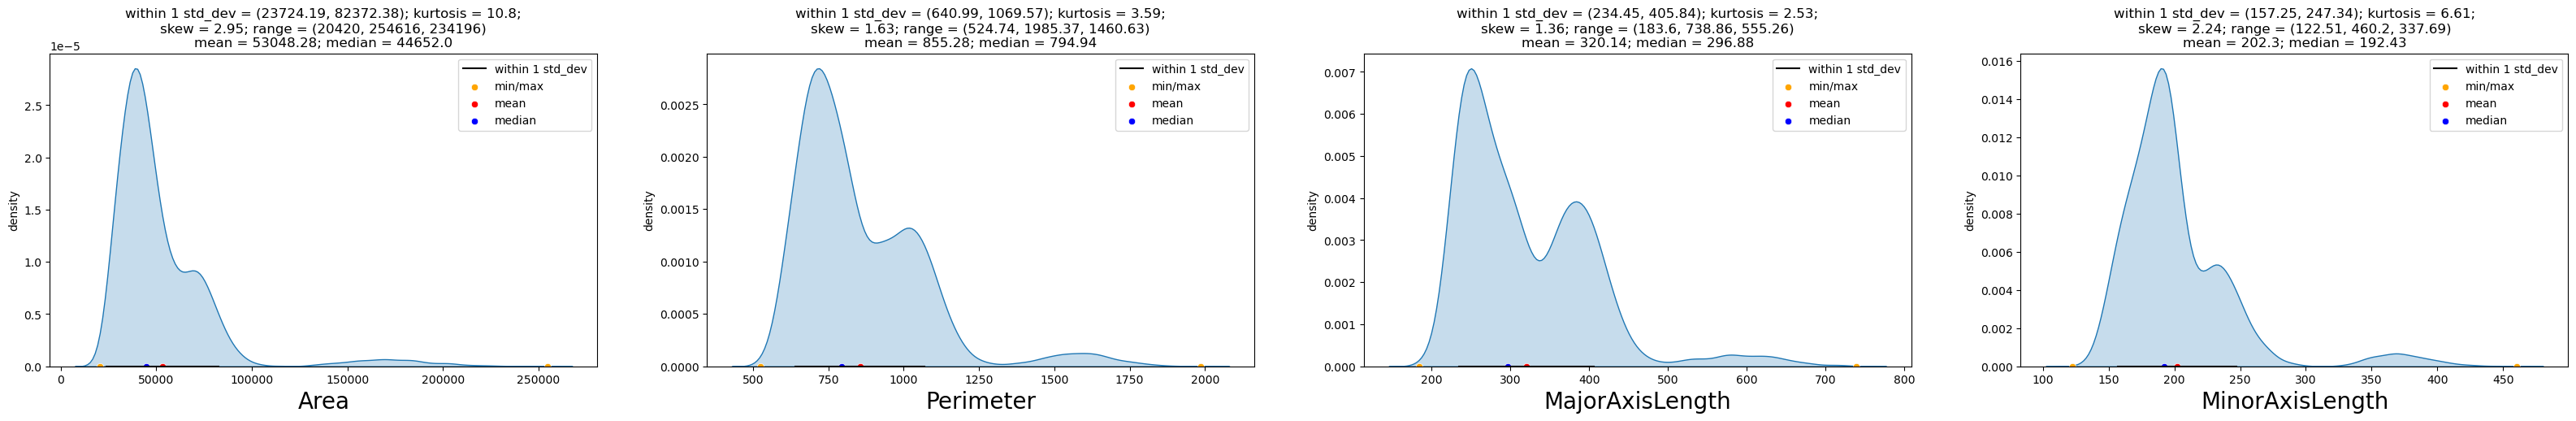

In [8]:
UVA_numeric(data, dimensions1)

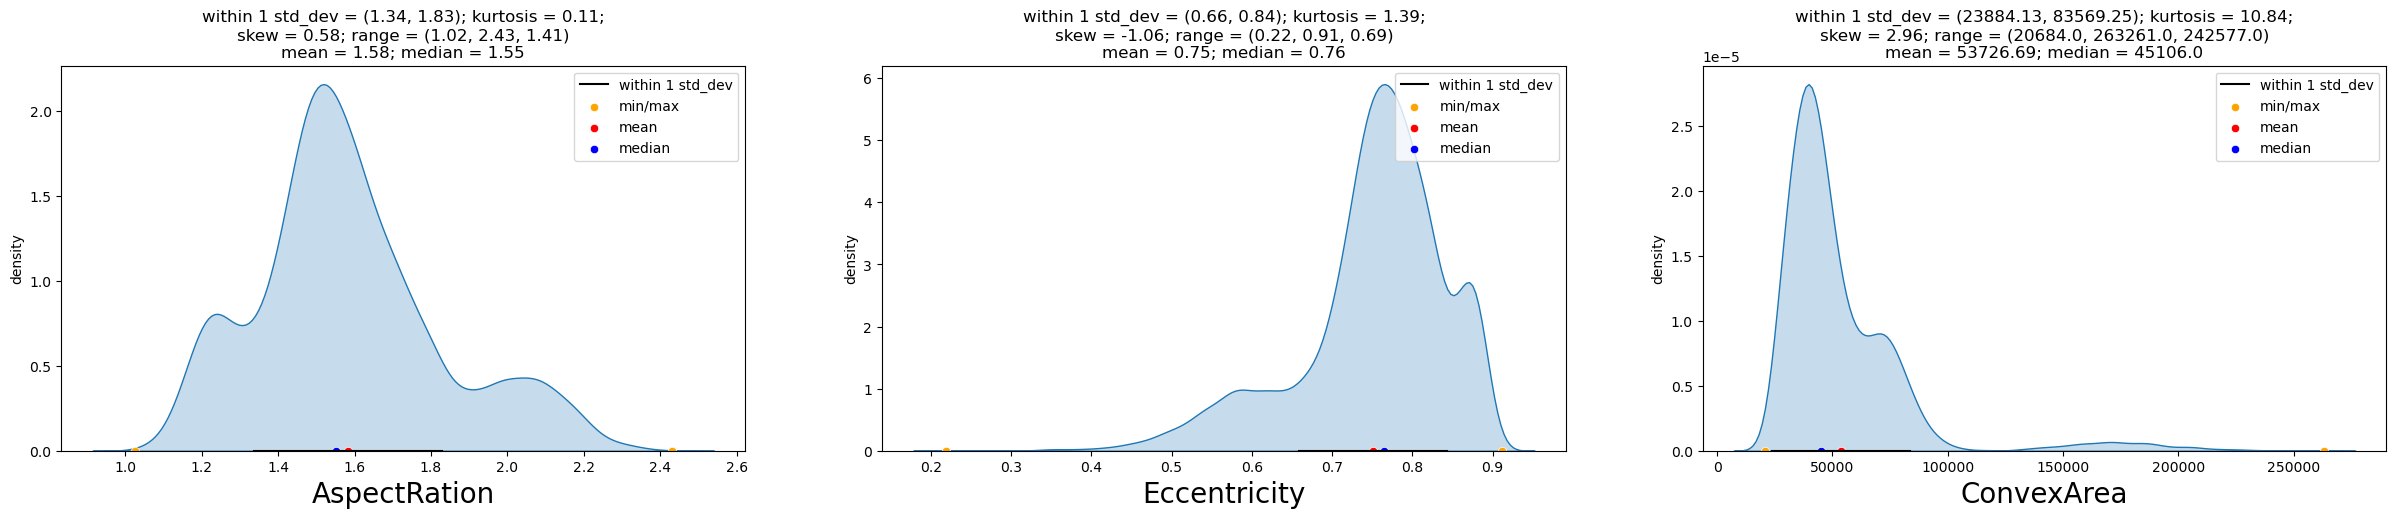

In [9]:
UVA_numeric(data, dimensions2)

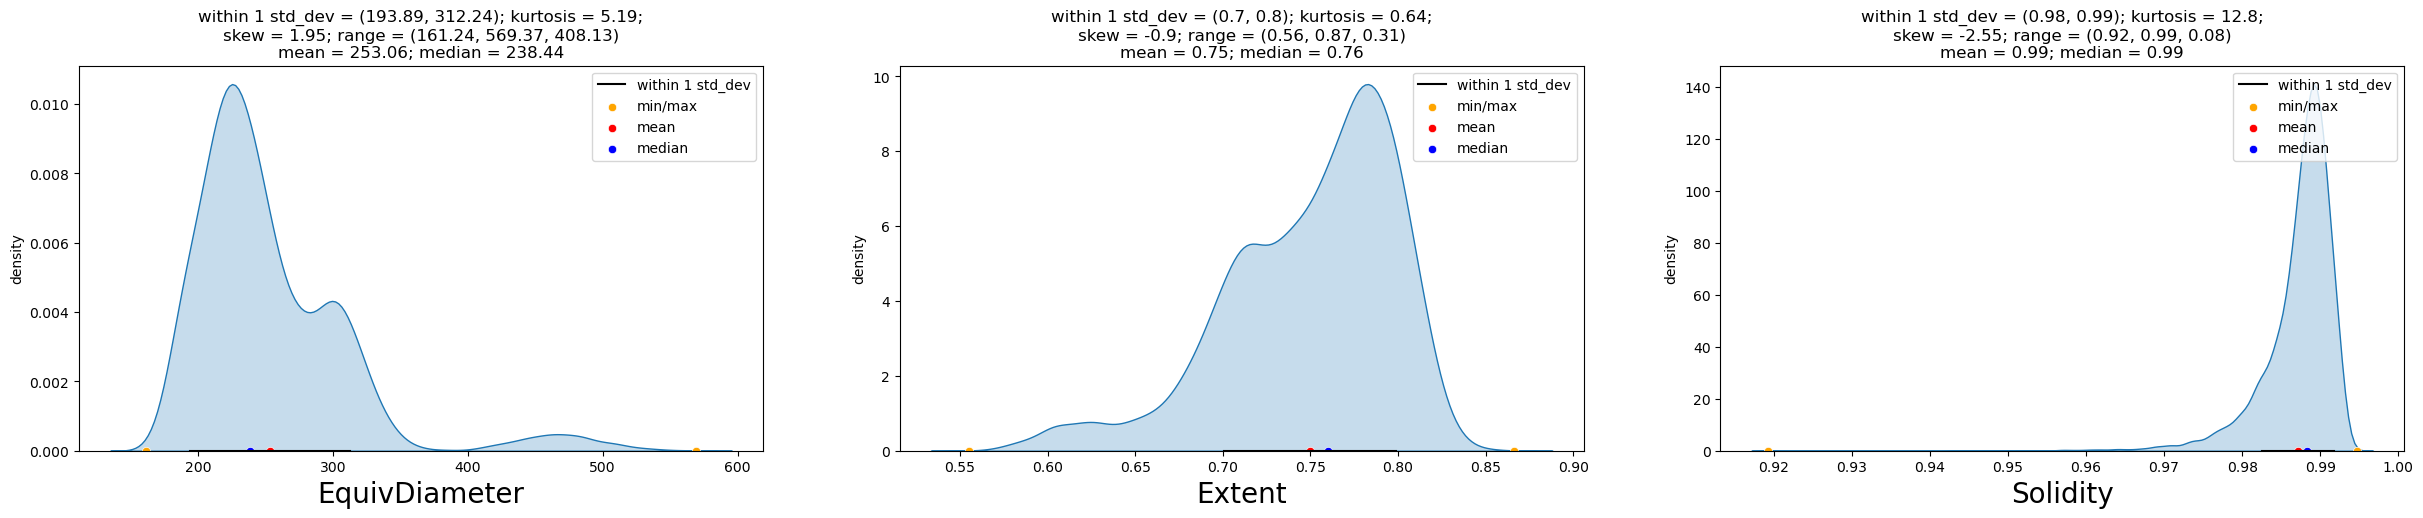

In [10]:
UVA_numeric(data, dimensions3)

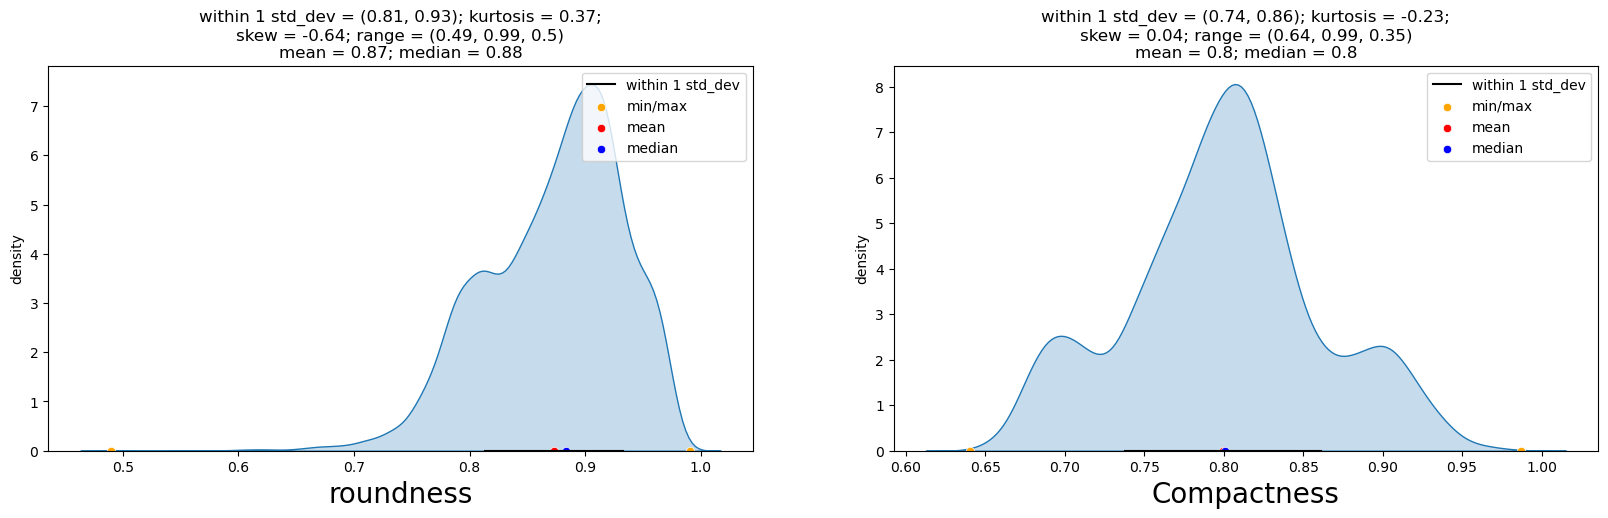

In [11]:
UVA_numeric(data, dimensions4)

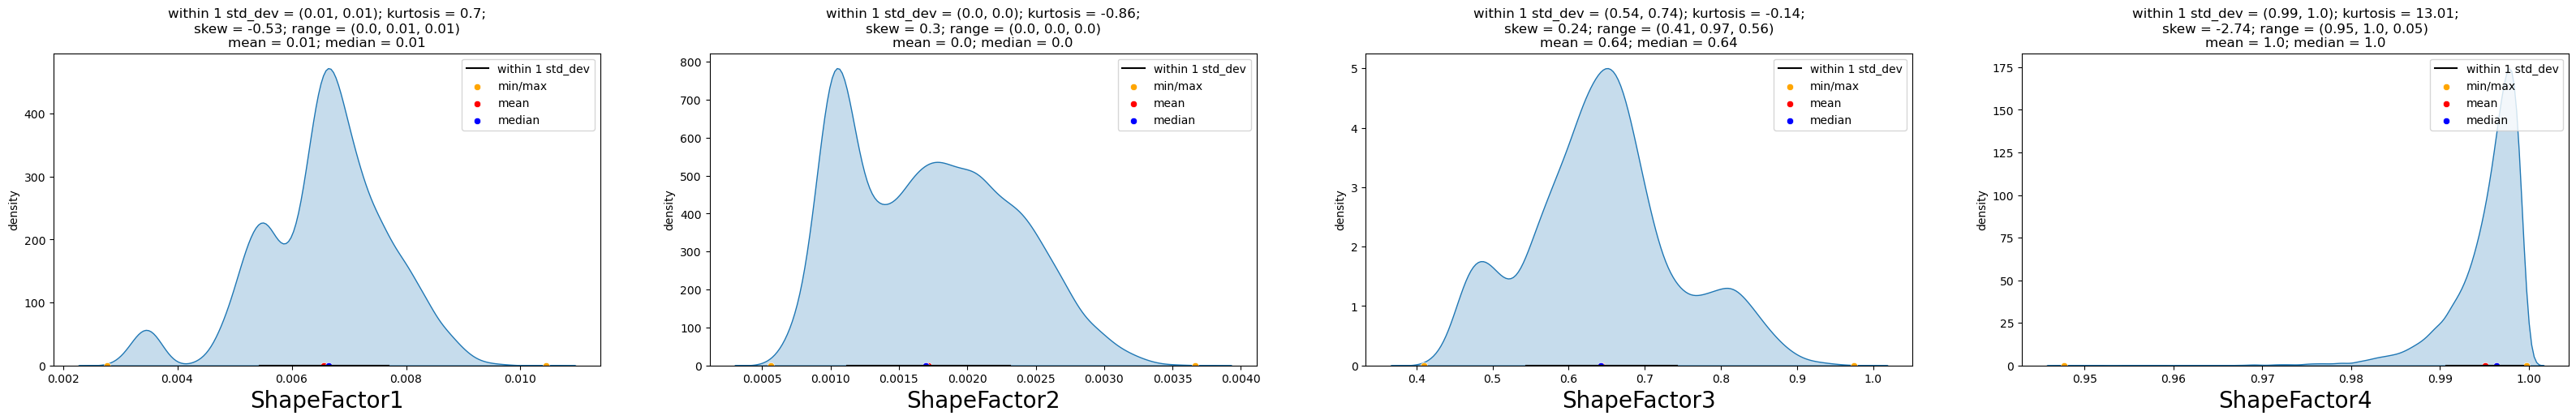

In [12]:
UVA_numeric(data, shape)

In [13]:
data['MinorAxisLength'].fillna(data['MinorAxisLength'].mean(),inplace=True)
data['ConvexArea'].fillna(data['ConvexArea'].mean(),inplace=True)
data['Compactness'].fillna(data['Compactness'].mean(),inplace=True)
data['ShapeFactor1'].fillna(data['ShapeFactor1'].mean(),inplace=True)
data['ShapeFactor4'].fillna(data['ShapeFactor4'].mean(),inplace=True)

In [14]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [15]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [16]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [17]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.917234,0.241735,0.267481,0.972207,0.984968,0.054345,-0.196585,-0.357530,-0.252894,-0.831369,-0.639291,-0.272145,-0.346188
Perimeter,0.966722,1.000000,0.977338,0.880376,0.385276,0.391066,0.939652,0.991380,-0.021160,-0.303970,-0.547647,-0.384926,-0.847967,-0.767592,-0.408435,-0.416396
MajorAxisLength,0.931834,0.977338,1.000000,0.796914,0.550335,0.541972,0.905420,0.961733,-0.078062,-0.284302,-0.596358,-0.537678,-0.758768,-0.859238,-0.568185,-0.467170
MinorAxisLength,0.917234,0.880376,0.796914,1.000000,-0.006437,0.020196,0.891837,0.914079,0.140389,-0.152810,-0.204196,-0.014540,-0.892994,-0.454933,-0.020591,-0.252302
AspectRation,0.241735,0.385276,0.550335,-0.006437,1.000000,0.924293,0.235699,0.303647,-0.370184,-0.267754,-0.766979,-0.935638,0.024133,-0.837841,-0.978592,-0.432871
Eccentricity,0.267481,0.391066,0.541972,0.020196,0.924293,1.000000,0.261193,0.318667,-0.319362,-0.297592,-0.722272,-0.917037,0.019268,-0.860141,-0.981058,-0.434249
ConvexArea,0.972207,0.939652,0.905420,0.891837,0.235699,0.261193,1.000000,0.956711,0.052927,-0.198773,-0.351092,-0.246375,-0.806391,-0.621207,-0.265623,-0.339826
EquivDiameter,0.984968,0.991380,0.961733,0.914079,0.303647,0.318667,0.956711,1.000000,0.028383,-0.231648,-0.435945,-0.309691,-0.875726,-0.713069,-0.330389,-0.380951
Extent,0.054345,-0.021160,-0.078062,0.140389,-0.370184,-0.319362,0.052927,0.028383,1.000000,0.191389,0.344411,0.340540,-0.140941,0.237956,0.347624,0.145273
Solidity,-0.196585,-0.303970,-0.284302,-0.152810,-0.267754,-0.297592,-0.198773,-0.231648,0.191389,1.000000,0.607150,0.291715,0.146556,0.343559,0.307662,0.666688


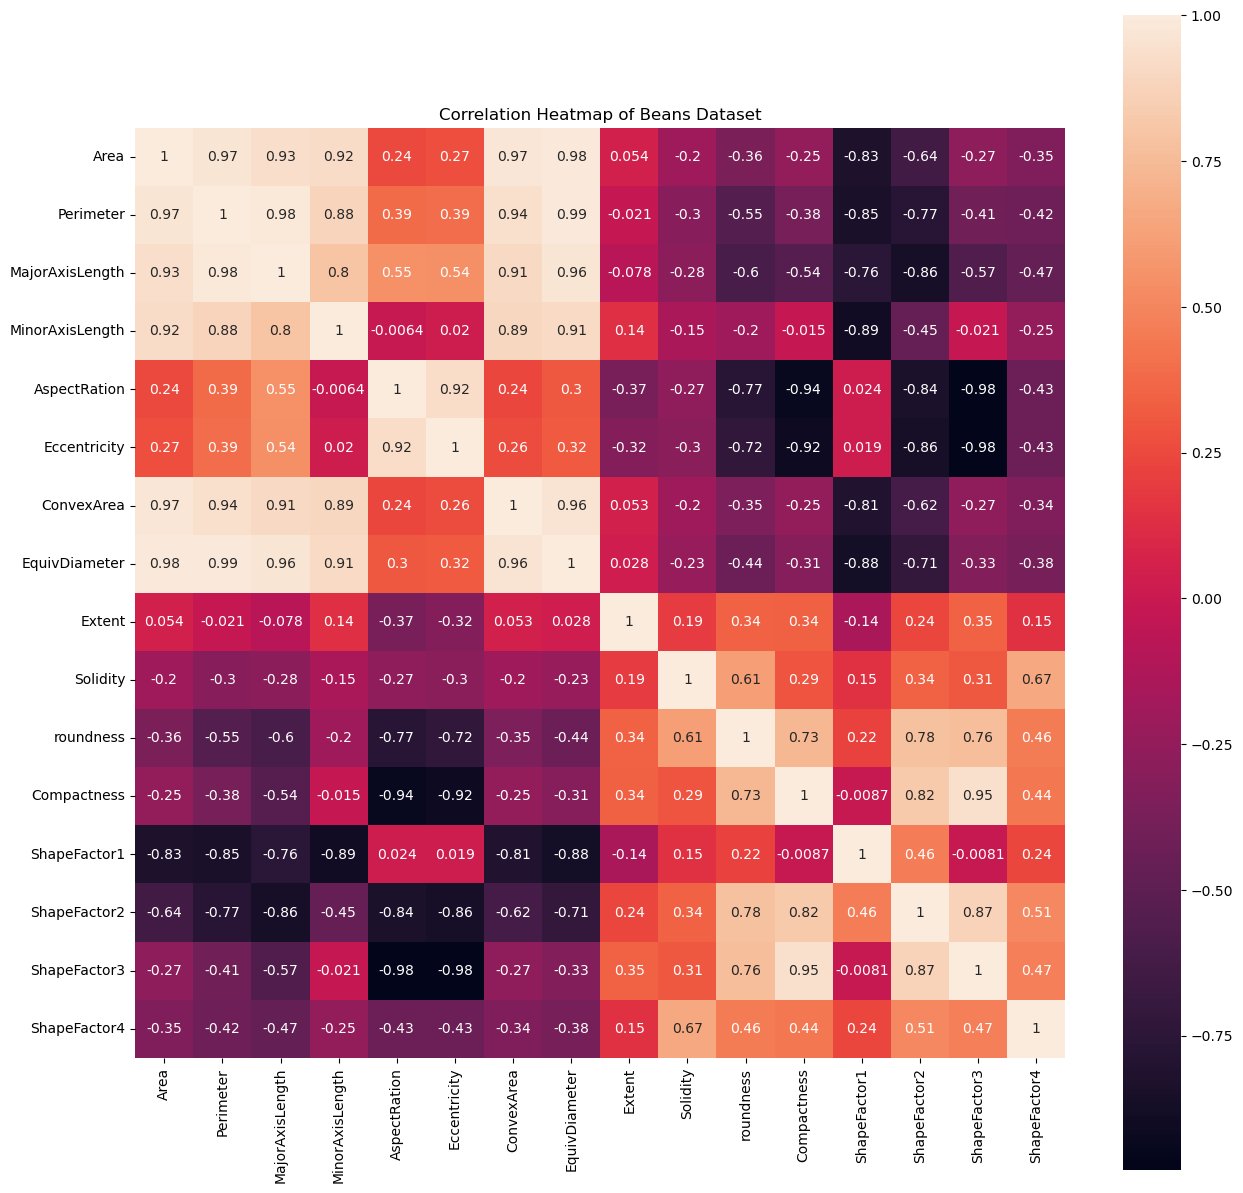

In [18]:
corr_matrix = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True)
plt.show()

In [19]:
encoding_mapping = {"DERMASON":1, "SIRA":2, "SEKER":3,"HOROZ":4, "CALI":5, "BARBUNYA":6,"BOMBAY":7}
data['Class'] = data['Class'].replace(encoding_mapping)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.000000,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.000000,191.272750,0.783968,0.984986,0.887034,0.799551,0.006979,0.003564,0.909851,0.998430,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.000000,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.000000,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.000000,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,53726.689413,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,1
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,53726.689413,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,1
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.000000,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,1
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.000000,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,1


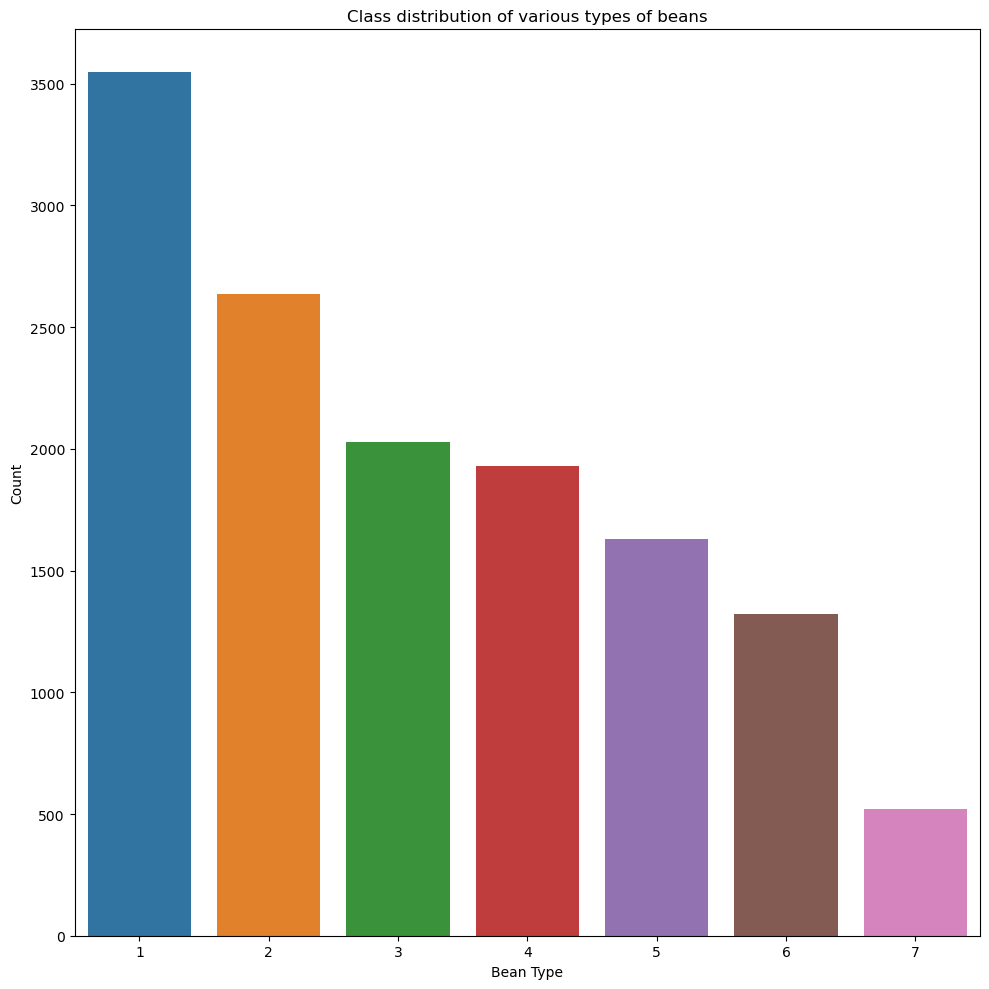

In [20]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Class', data=data)
plt.xlabel('Bean Type')
plt.ylabel('Count')
plt.title('Class distribution of various types of beans')
plt.tight_layout()

plt.show()


<Axes: xlabel='Class', ylabel='MajorAxisLength'>

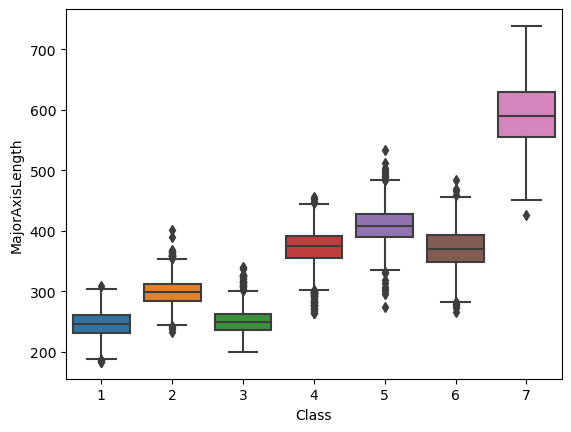

In [21]:
sns.boxplot(x='Class', y='MajorAxisLength', data=data)

<Axes: xlabel='Class', ylabel='MinorAxisLength'>

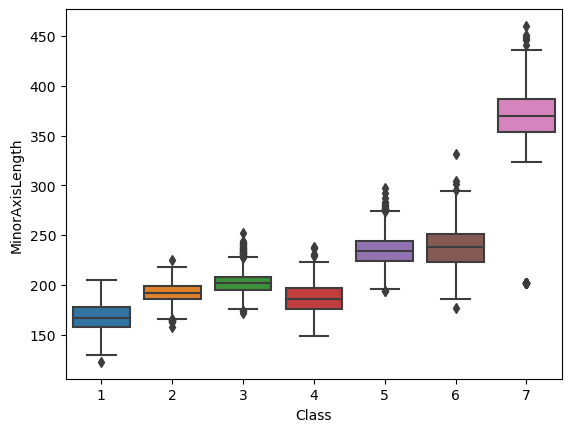

In [22]:
sns.boxplot(x='Class', y='MinorAxisLength', data=data)

<Axes: xlabel='Class', ylabel='AspectRation'>

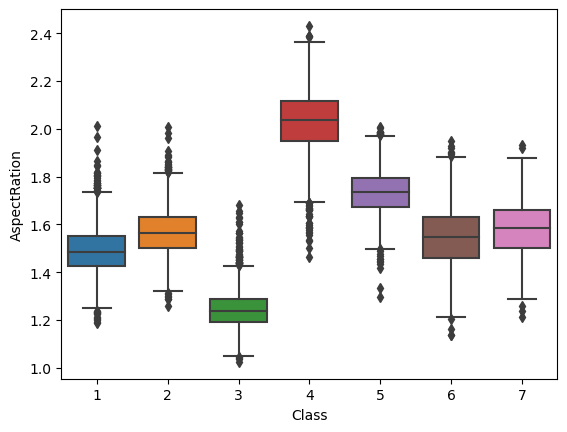

In [23]:
sns.boxplot(x='Class', y='AspectRation', data=data)

<Axes: xlabel='Class', ylabel='Eccentricity'>

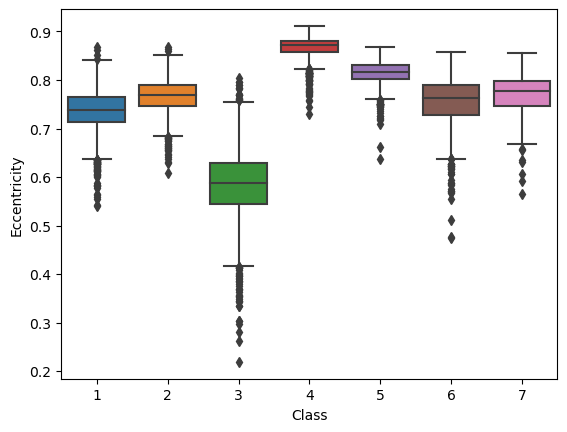

In [24]:
sns.boxplot(x='Class', y='Eccentricity', data=data)

<Axes: xlabel='Class', ylabel='ConvexArea'>

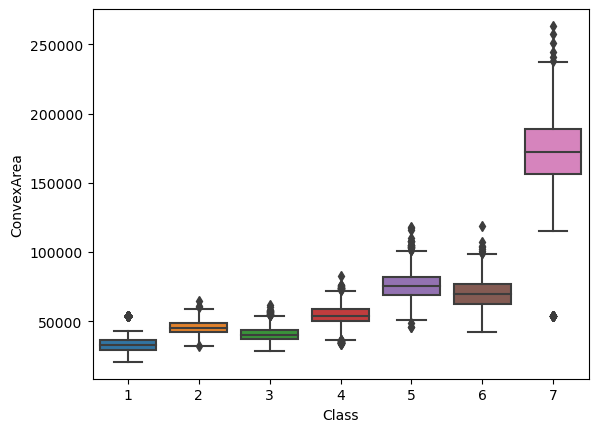

In [25]:
sns.boxplot(x='Class', y='ConvexArea', data=data)

<Axes: xlabel='Class', ylabel='EquivDiameter'>

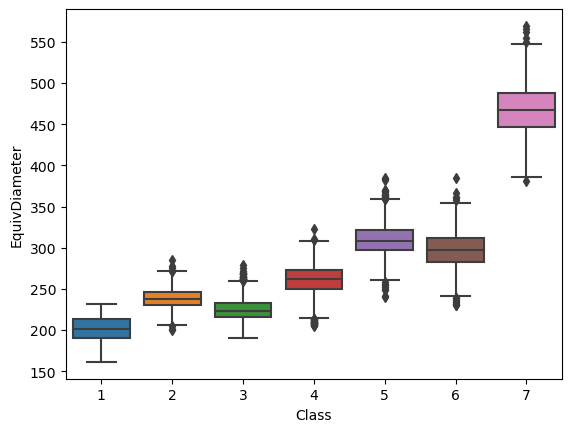

In [26]:
sns.boxplot(x='Class', y='EquivDiameter', data=data)

<Axes: xlabel='Class', ylabel='Extent'>

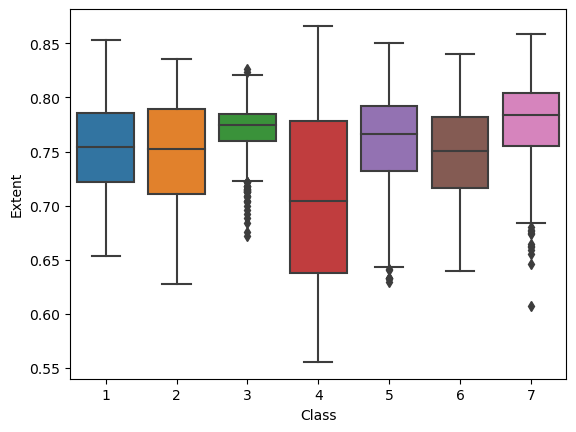

In [27]:
sns.boxplot(x='Class', y='Extent', data=data)

<Axes: xlabel='Class', ylabel='Solidity'>

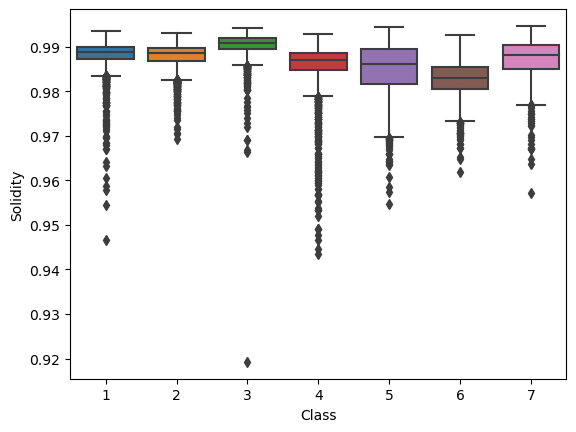

In [28]:
sns.boxplot(x='Class', y='Solidity', data=data)

<Axes: xlabel='Class', ylabel='roundness'>

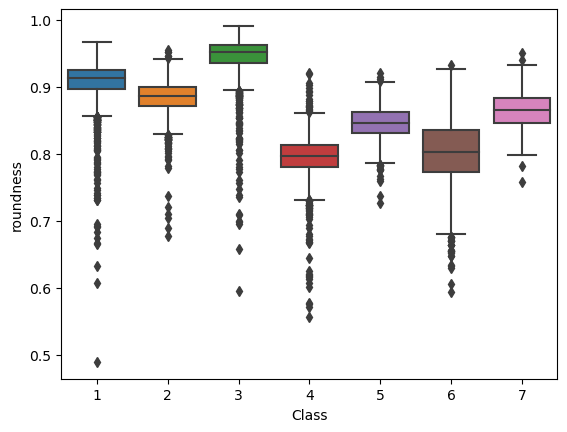

In [29]:
sns.boxplot(x='Class', y='roundness', data=data)

<Axes: xlabel='Class', ylabel='Compactness'>

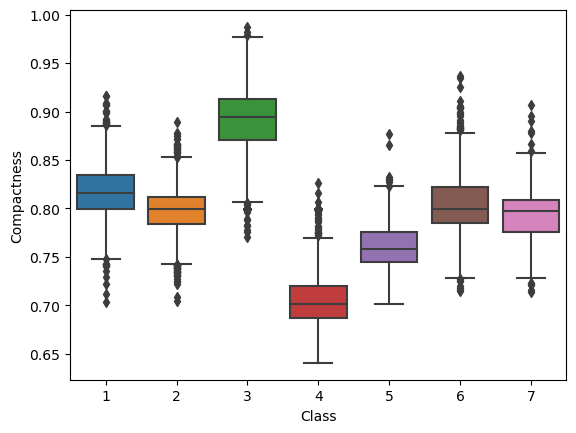

In [30]:
sns.boxplot(x='Class', y='Compactness', data=data)

# Outlier treatment Not Required


In [31]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Area               25004.000000
Perimeter            273.689500
MajorAxisLength      123.191380
MinorAxisLength       35.498978
AspectRation           0.274802
Eccentricity           0.094538
ConvexArea         23257.500000
EquivDiameter         64.378463
Extent                 0.068218
Solidity               0.004343
roundness              0.084773
Compactness            0.061419
ShapeFactor1           0.001292
ShapeFactor2           0.001017
ShapeFactor3           0.114648
ShapeFactor4           0.003753
Class                  4.000000
dtype: float64


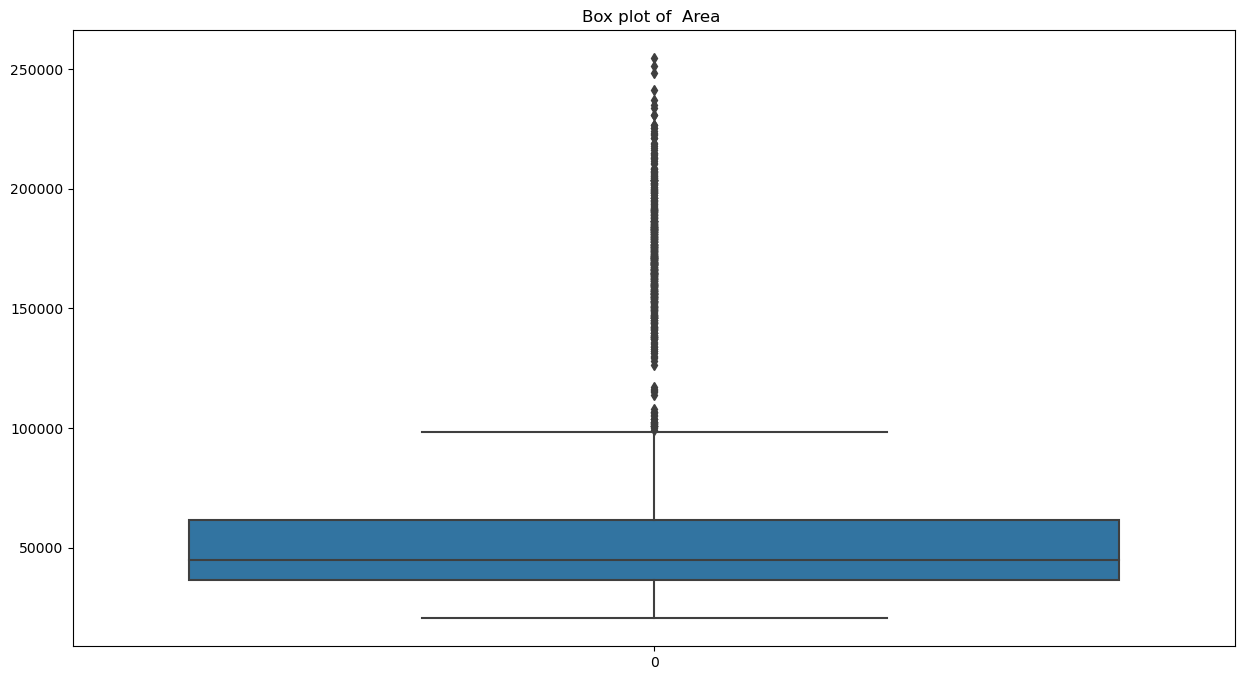

In [32]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  Area ")
ax = sns.boxplot(data=data['Area'])

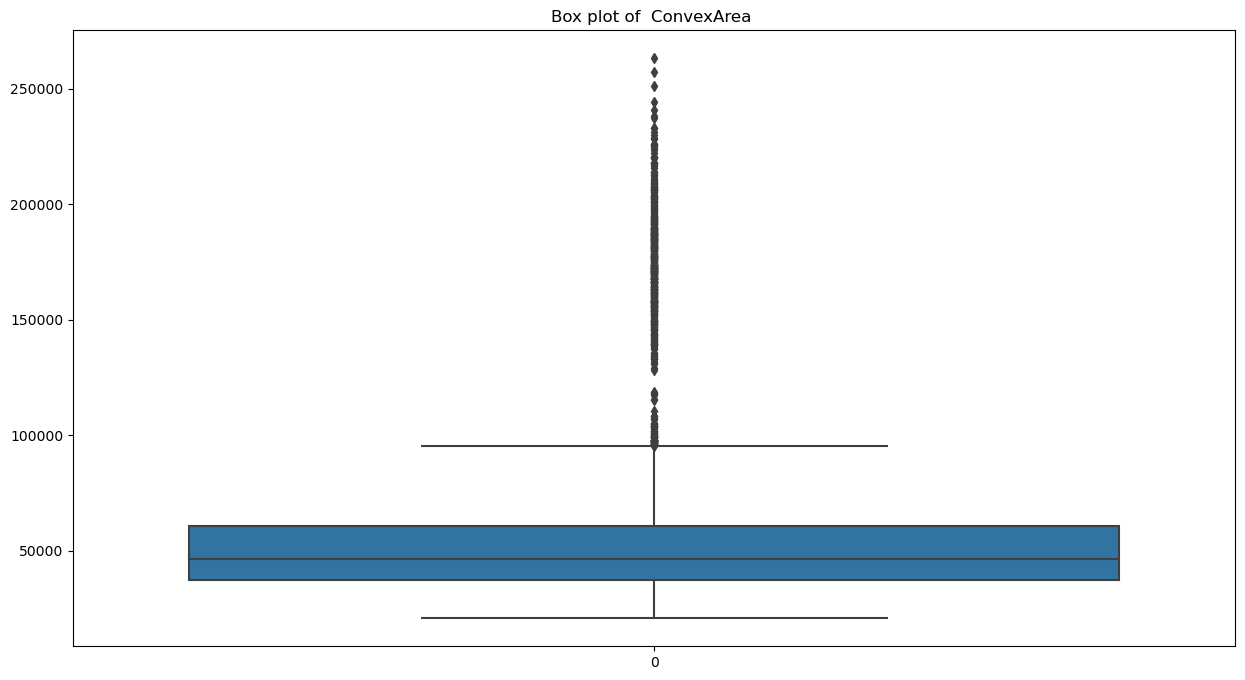

In [33]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  ConvexArea ")
ax = sns.boxplot(data=data['ConvexArea'])

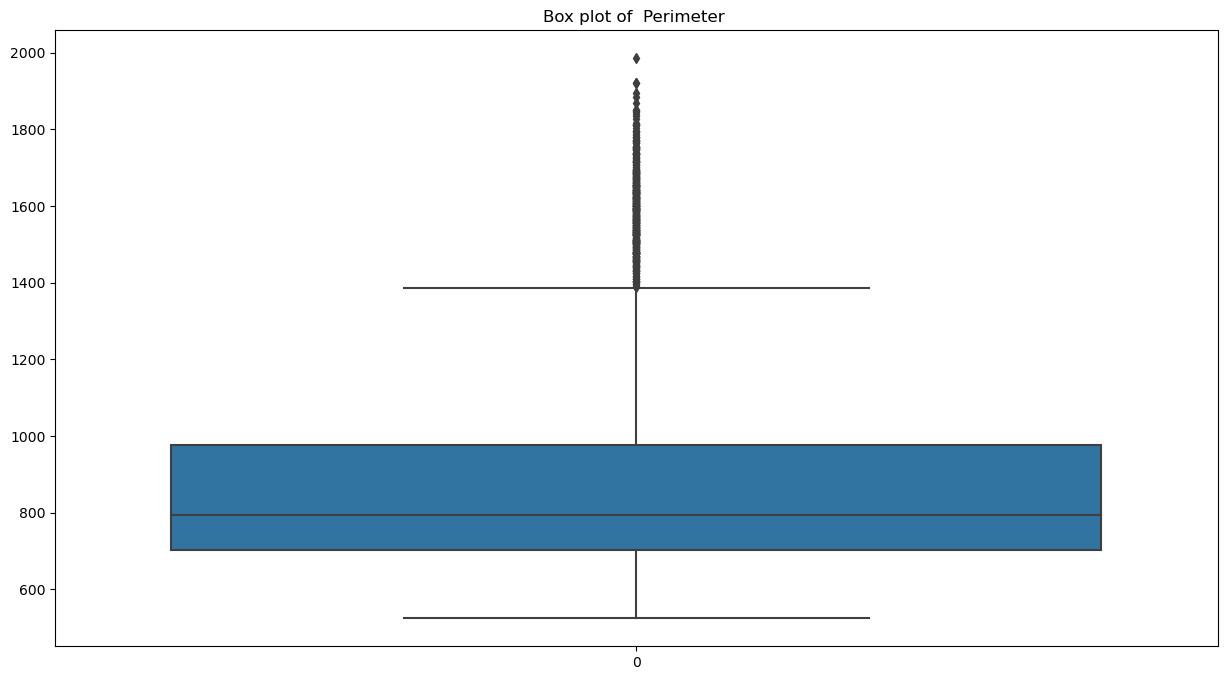

In [34]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  Perimeter ")
ax = sns.boxplot(data=data['Perimeter'])

# Splitting data set 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x=data.drop(['Class'],axis=1)
y=data['Class']
x.shape ,y.shape

((13611, 16), (13611,))

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=56)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10208, 16) (3403, 16) (10208,) (3403,)


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.295543,43.299974,122.512653,177.465431,194.689529,212.964409,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53726.689413,28948.807252,20684.000000,37282.500000,46319.000000,60540.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [39]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train= pd.DataFrame(x_train)
x_test = pd.DataFrame(scaler.transform(x_test))
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10208.0,-2.436226e-18,1.000049,-1.103198,-0.567643,-0.290432,0.279375,6.780450
1,10208.0,-8.909627e-17,1.000049,-1.531562,-0.705767,-0.287336,0.563332,5.226664
2,10208.0,8.032585e-16,1.000049,-1.583459,-0.776503,-0.276272,0.655147,4.848025
3,10208.0,-5.304012e-16,1.000049,-1.829211,-0.573070,-0.177625,0.243092,5.674401
4,10208.0,-4.023253e-16,1.000049,-2.221441,-0.616113,-0.123879,0.505363,3.284853
5,10208.0,1.308601e-16,1.000049,-5.296785,-0.384216,0.152689,0.648060,1.711504
6,10208.0,-2.309194e-16,1.000049,-1.135190,-0.567260,-0.258312,0.233147,7.166518
7,10208.0,-1.261617e-16,1.000049,-1.539754,-0.639255,-0.252282,0.443732,5.287858
8,10208.0,2.105595e-15,1.000049,-3.969614,-0.636311,0.206913,0.757542,2.367859
9,10208.0,2.165840e-14,1.000049,-14.627427,-0.310754,0.244570,0.614455,1.614271


# Logistic Regression

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [41]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [43]:
# Creating instance of Logistic Regresssion
logreg = LogisticRegression()

# Fitting the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [44]:
# Predicting over the Train
train_predict = logreg.predict(x_train)
train_predict

array([2, 5, 2, ..., 6, 3, 6], dtype=int64)

In [45]:
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

In [46]:
print(accuracy_score(y_test,y_pred_test))
print(logreg.score(x_test,y_test))

0.9233029679694388
0.9233029679694388


In [47]:
print(accuracy_score(y_train,y_pred_train))
print(logreg.score(x_train,y_train))

0.9217280564263323
0.9217280564263323


# Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
#Creating a Gradient Boosting instance
Gb=GradientBoostingClassifier()

In [50]:
Gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [51]:
#calculating score on training data
Gb.score(x_train, y_train)

0.9622844827586207

In [52]:
#calculating score on test data
Gb.score(x_test, y_test)

0.9233029679694388

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
#creating a random forest instance
Rf = RandomForestClassifier(random_state=96)

In [55]:
#fit the model
Rf.fit(x_train,y_train)

RandomForestClassifier(random_state=96)

In [56]:
#calculating score on training data
Rf.score(x_train, y_train)

1.0

In [57]:
#calculating score on test data
Rf.score(x_test, y_test)

0.9203643843667353

In [58]:
#looking at the feature importance
Rf.feature_importances_

array([0.06937871, 0.11451454, 0.09195442, 0.03388898, 0.08381757,
       0.08330945, 0.0344911 , 0.07451478, 0.01134263, 0.01717094,
       0.06447245, 0.03547486, 0.08079738, 0.05474729, 0.12557402,
       0.02455088])

In [59]:
x_train_df = pd.DataFrame(x_train, columns=x.columns)
feature_importances = pd.Series(Rf.feature_importances_, index=x_train_df.columns)

In [60]:
feature_importances = pd.Series(Rf.feature_importances_, index=x.columns)
feature_importances

Area               0.069379
Perimeter          0.114515
MajorAxisLength    0.091954
MinorAxisLength    0.033889
AspectRation       0.083818
Eccentricity       0.083309
ConvexArea         0.034491
EquivDiameter      0.074515
Extent             0.011343
Solidity           0.017171
roundness          0.064472
Compactness        0.035475
ShapeFactor1       0.080797
ShapeFactor2       0.054747
ShapeFactor3       0.125574
ShapeFactor4       0.024551
dtype: float64

# For more details you can reachout to me on my mail :
pritampathrabe123@gmail.com